In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier





In [120]:
train = pd.read_csv('data/train.csv', sep=',')
train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [121]:
train.set_index('PassengerId', inplace=True)

In [122]:
print(train.columns)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [123]:
def parse_model_1(file_path):
    try:
        # Chargement du fichier CSV dans un DataFrame pandas
        df = pd.read_csv(file_path)
        
        # Vérification de la présence des colonnes nécessaires
        required_columns = ['PassengerId', 'Fare', 'SibSp', 'Parch', 'Survived']
        if not all(column in df.columns for column in required_columns):
            missing_cols = list(set(required_columns) - set(df.columns))
            raise ValueError(f"Le fichier fourni manque des colonnes nécessaires: {missing_cols}")
        
        # Extrait le vecteur de sortie y (Survived)
        y = df['Survived']
        
        # Extrait la matrice X (PassengerId, Fare, SibSp, Parch)
        X = df[['Fare', 'SibSp', 'Parch']]
        
        return X, y
    except KeyError as e:
        raise KeyError(f"La colonne spécifiée n'est pas dans le DataFrame: {e}")

X, y = parse_model_1('data/train.csv')
print(X.head())



      Fare  SibSp  Parch
0   7.2500      1      0
1  71.2833      1      0
2   7.9250      0      0
3  53.1000      1      0
4   8.0500      0      0


In [124]:
def compute_score(classifier, X, y, cv=5):
    # Utilisation de cross_val_score pour effectuer la validation croisée
    scores = cross_val_score(classifier, X, y, cv=cv)
    # Calcul de la moyenne des scores obtenus
    mean_score = np.mean(scores)
    return mean_score

# Création du modèle de régression logistique
logistic_model = LogisticRegression(solver='liblinear')
logistic_model = LogisticRegression(solver='liblinear')
average_score = compute_score(logistic_model, X, y)
print(f'Le score moyen de la validation croisée est : {average_score}')

Le score moyen de la validation croisée est : 0.6746092524009792


In [125]:
# Préparation des données avec la fonction parse_model_1
X, y = parse_model_1('data/train.csv')

# Création et évaluation du modèle de régression logistique
logistic_model = LogisticRegression(solver='liblinear', random_state=42)
score_moyen = compute_score(logistic_model, X, y)

print(f'Le score moyen de la régression logistique avec validation croisée est : {score_moyen}')


Le score moyen de la régression logistique avec validation croisée est : 0.6746092524009792


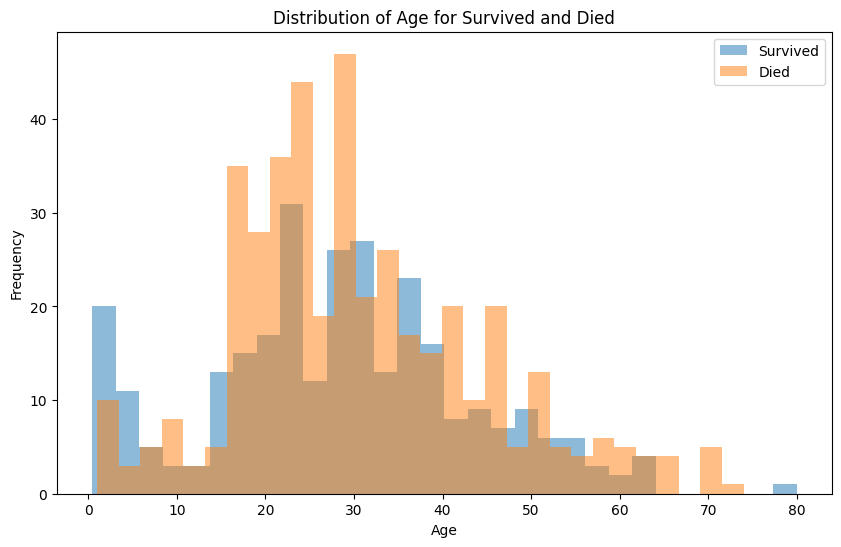

In [126]:
survived = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

# Définition de la fonction plot_hist
def plot_hist(variable):
    plt.figure(figsize=(10, 6))
    plt.hist(survived[variable].dropna(), bins=30, alpha=0.5, label='Survived')
    plt.hist(dead[variable].dropna(), bins=30, alpha=0.5, label='Died')
    plt.title(f'Distribution of {variable} for Survived and Died')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

# Appel de la fonction avec la variable 'Age'
plot_hist('Age')

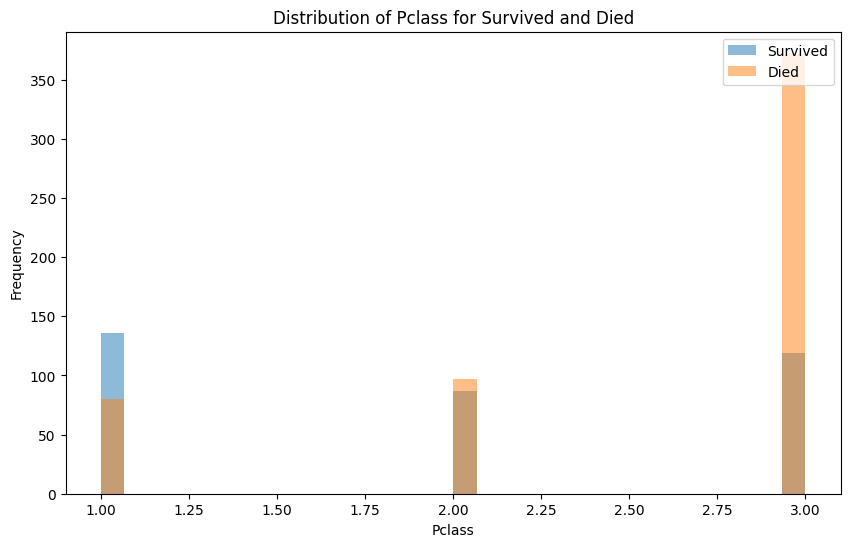

In [127]:
plot_hist('Pclass')

In [128]:
def parse_model_2(file_path):
    # Chargement du fichier CSV dans un DataFrame pandas
    df = pd.read_csv(file_path)
    
    # Extrait le vecteur de sortie y (Survived)
    y = df['Survived']
    
    # Extrait la matrice X (Fare, SibSp, Parch)
    X = df[['Fare', 'SibSp', 'Parch']]
    
    # Transformation de Pclass en variables dummies
    dummies = pd.get_dummies(df['Pclass'], prefix='Pclass')
    X = pd.concat([X, dummies], axis=1)
    
    return X, y

In [129]:
X, y = parse_model_2('data/train.csv')
print(X.head())

      Fare  SibSp  Parch  Pclass_1  Pclass_2  Pclass_3
0   7.2500      1      0     False     False      True
1  71.2833      1      0      True     False     False
2   7.9250      0      0     False     False      True
3  53.1000      1      0      True     False     False
4   8.0500      0      0     False     False      True


In [130]:
X, y = parse_model_2('data/train.csv')

# Création du modèle de régression logistique
model = LogisticRegression(max_iter=400, solver='liblinear')

# Calcul du score de validation croisée
scores = cross_val_score(model, X, y, cv=5)

# Calcul de la moyenne des scores pour avoir une estimation de la performance
score_moyen = scores.mean()

print(f'Score moyen de la régression logistique avec validation croisée : {score_moyen}')

Score moyen de la régression logistique avec validation croisée : 0.691456907915385


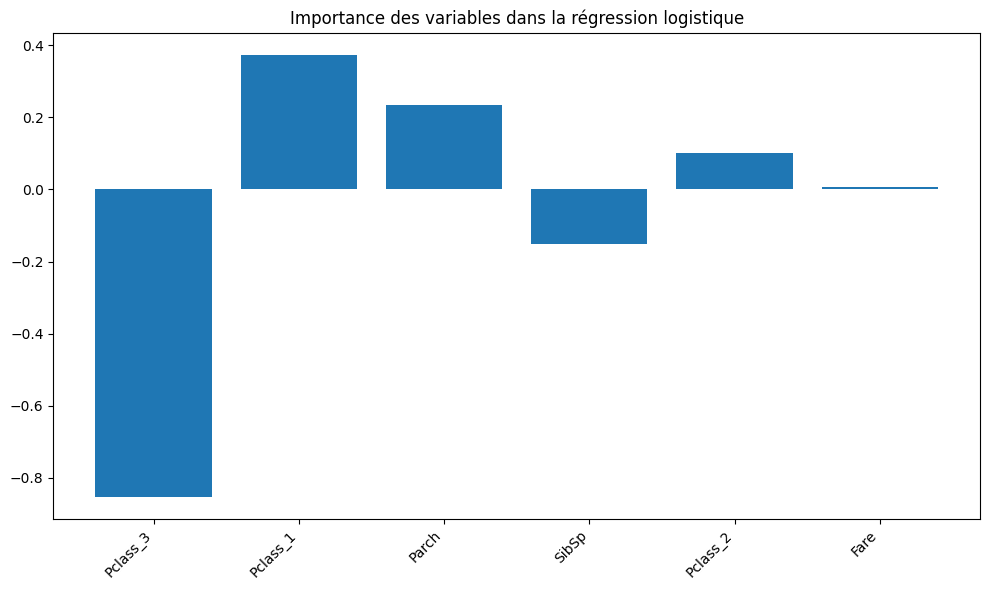

In [131]:
model = LogisticRegression(max_iter=400, solver='liblinear')
model.fit(X, y)

# Récupération des noms des variables (colonnes) et des coefficients
feature_names = X.columns
coefficients = model.coef_[0]

# Tri des coefficients et de leurs noms par ordre d'importance (absolu)
indices = np.argsort(np.abs(coefficients))[::-1]

# Création du graphique
plt.figure(figsize=(10, 6))
plt.title("Importance des variables dans la régression logistique")
plt.bar(range(X.shape[1]), coefficients[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [132]:
def parse_model_3(file_path):
    # Chargement du fichier CSV dans un DataFrame pandas
    df = pd.read_csv(file_path)
    
    # Extrait le vecteur de sortie y (Survived)
    y = df['Survived']
    
    # Extrait la matrice X et transforme Pclass en dummies
    X = df[['Fare', 'SibSp', 'Parch']]
    pclass_dummies = pd.get_dummies(df['Pclass'], prefix='Pclass')
    X = pd.concat([X, pclass_dummies], axis=1)
    
    # Ajout de la variable Sex transformée en dummies
    sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
    X = pd.concat([X, sex_dummies], axis=1)
    
    # Traitement de la variable Age: imputation des valeurs manquantes par la médiane
    X['Age'] = df['Age'].fillna(df['Age'].median())
    
    return X, y

In [133]:
X, y = parse_model_3('data/train.csv')
X.head()

,Fare,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age
0,7.2500,1,0,False,False,True,False,True,22.0
1,71.2833,1,0,True,False,False,True,False,38.0
2,7.9250,0,0,False,False,True,True,False,26.0
3,53.1000,1,0,True,False,False,True,False,35.0
4,8.0500,0,0,False,False,True,False,True,35.0


In [134]:
model = LogisticRegression(max_iter=400, solver='liblinear')

# Calcul du score moyen de la validation croisée
scores = cross_val_score(model, X, y, cv=5)

# Calcul de la moyenne des scores pour avoir une estimation de la performance
score_moyen = scores.mean()

print(f'Score moyen avec le nouveau modèle (incluant Sex et Age) : {score_moyen}')

Score moyen avec le nouveau modèle (incluant Sex et Age) : 0.7867553825874083


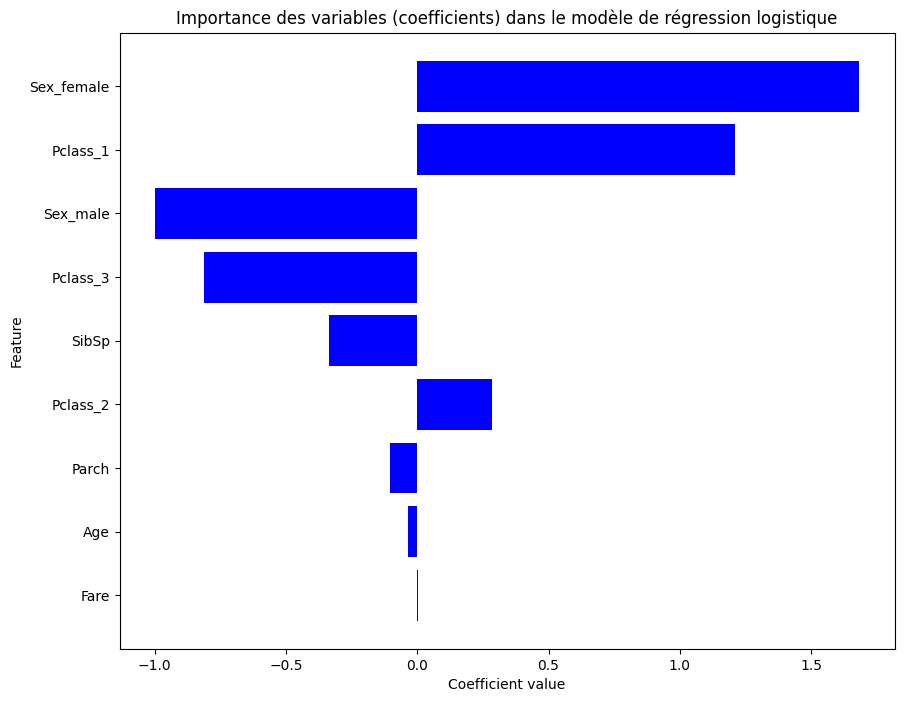

In [135]:
model = LogisticRegression(max_iter=400, solver='liblinear')
model.fit(X, y)

# Extraction des coefficients
coefs = model.coef_[0]
features = X.columns

# Affichage des coefficients dans un graphique
indices = np.argsort(np.abs(coefs))
plt.figure(figsize=(10, 8))
plt.title('Importance des variables (coefficients) dans le modèle de régression logistique')
plt.barh(range(len(indices)), coefs[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Coefficient value')
plt.ylabel('Feature')
plt.show()

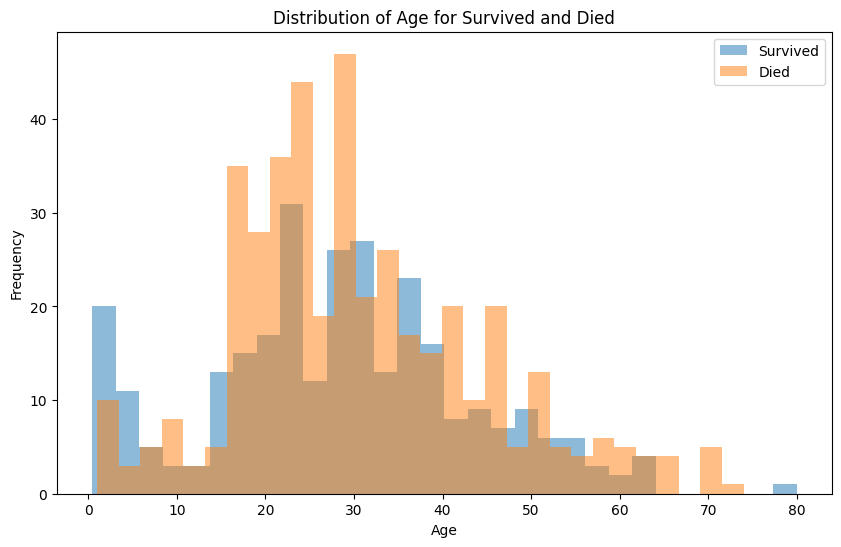

In [136]:
plot_hist('Age')


In [137]:
def parse_model_4(file_path):
    df = pd.read_csv(file_path)
    
    # Préparation de X et y comme précédemment
    X, y = parse_model_3(file_path)  # Assurez-vous que cette fonction retourne df pour obtenir Age
    
    # Ajout de la variable is_child
    X['is_child'] = df['Age'] < 8
    
    return X, y


In [138]:
# Utilisation de la fonction modifiée pour préparer les données
X, y = parse_model_4('data/train.csv')

# Création et évaluation du modèle
model = LogisticRegression(max_iter=400, solver='liblinear')
score = compute_score(model, X, y)

print(f'Score avec la variable is_child : {score}')

Score avec la variable is_child : 0.8002134203753689


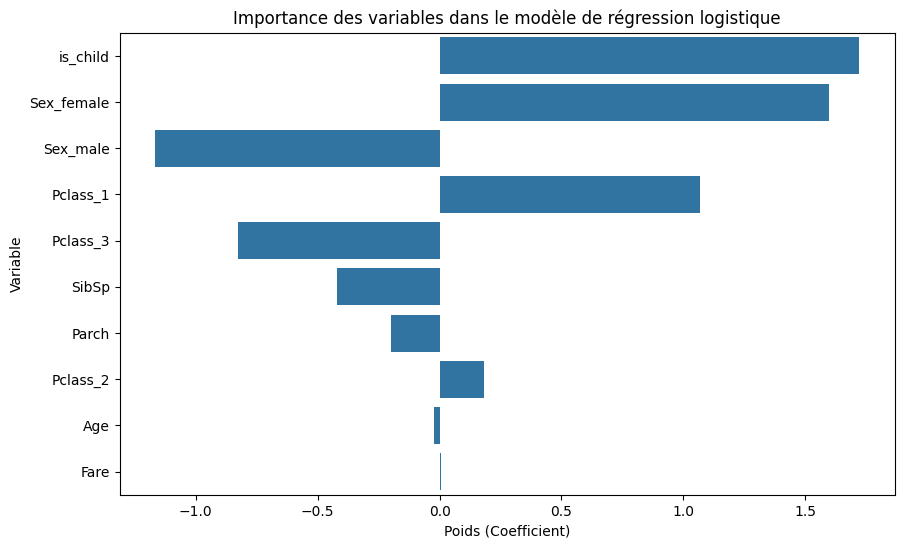

In [139]:
# Assumons que vous avez déjà ajusté votre modèle de régression logistique, incluant `is_child`
model.fit(X, y)

# Extraction des noms des variables (features) et des coefficients du modèle
features = X.columns
coefficients = model.coef_[0]

# Création d'un DataFrame pour stocker les noms des variables et leurs coefficients
coef_df = pd.DataFrame({'Variable': features, 'Coefficient': coefficients})

# Tri du DataFrame par valeurs absolues des coefficients pour mettre en évidence les plus importants
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

# Affichage des coefficients dans un graphique de barres
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coef_df)
plt.title('Importance des variables dans le modèle de régression logistique')
plt.xlabel('Poids (Coefficient)')
plt.ylabel('Variable')
plt.show()

In [140]:
# Création du classificateur Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement du modèle et calcul du score moyen de la validation croisée
scores = cross_val_score(rf_model, X, y, cv=5)
score_moyen = scores.mean()

print(f'Score moyen avec Random Forest : {score_moyen}')

Score moyen avec Random Forest : 0.8069989328981231


In [142]:
#5.1.2
"""Score moyen : Le score moyen obtenu à partir de la validation croisée donne une indication de la performance du modèle de forêt aléatoire sur votre jeu de données. Comparé aux scores obtenus avec la régression logistique, cela peut vous donner une idée de l'efficacité de la forêt aléatoire pour ce problème spécifique.

Interprétation : Les forêts aléatoires sont des modèles puissants capables de capturer des relations complexes entre les variables. Une amélioration du score par rapport aux modèles précédents pourrait indiquer que ces relations complexes jouent un rôle important dans la prédiction de survie sur le Titanic. Toutefois, il est également important de considérer la possibilité de surajustement, surtout si le modèle est très complexe ou si le nombre d'arbres (n_estimators) est très élevé."""

"Score moyen : Le score moyen obtenu à partir de la validation croisée donne une indication de la performance du modèle de forêt aléatoire sur votre jeu de données. Comparé aux scores obtenus avec la régression logistique, cela peut vous donner une idée de l'efficacité de la forêt aléatoire pour ce problème spécifique.\n\nInterprétation : Les forêts aléatoires sont des modèles puissants capables de capturer des relations complexes entre les variables. Une amélioration du score par rapport aux modèles précédents pourrait indiquer que ces relations complexes jouent un rôle important dans la prédiction de survie sur le Titanic. Toutefois, il est également important de considérer la possibilité de surajustement, surtout si le modèle est très complexe ou si le nombre d'arbres (n_estimators) est très élevé."

In [143]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

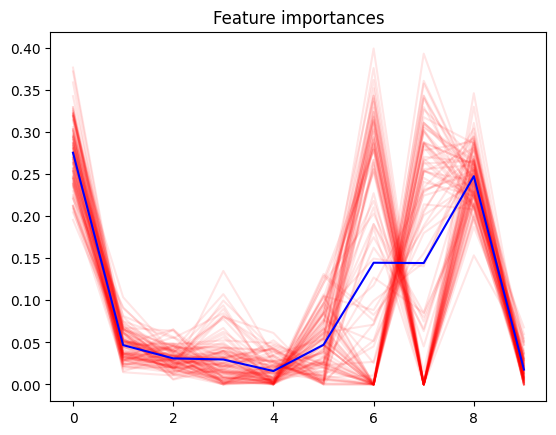

In [146]:
# Extraction des importances des caractéristiques pour chaque arbre
importances = [tree.feature_importances_ for tree in rf_model.estimators_]

# Création d'un graphique de l'importance des caractéristiques pour chaque arbre
plt.figure()
for i in range(len(rf_model.estimators_)):
    plt.plot(importances[i], "r-", alpha=0.1)
    
# La ligne bleue représente la moyenne des importances sur tous les arbres
plt.plot(np.mean(importances, axis=0), "b-")

plt.title("Feature importances")
plt.show()

In [147]:
def extract_title(name):
    # Extrait le titre en découpant le nom par des virgules et des points.
    return name.split(',')[1].split('.')[0].strip()

# Appliquer la fonction extract_title à chaque nom dans la colonne Name du DataFrame
# et créer une nouvelle colonne 'Title'.
train['Title'] = train['Name'].apply(extract_title)

# Afficher les premières lignes pour vérifier que la nouvelle colonne a été créée correctement.
train[['Name', 'Title']].head()

,Name,Title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
3,"Heikkinen, Miss. Laina",Miss
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
5,"Allen, Mr. William Henry",Mr


In [149]:
def extract_deck(cabin):
    # Retourner 'M' (pour Missing) si la valeur de la cabine est manquante
    return cabin[0] if pd.notnull(cabin) else 'M'

# Appliquer la fonction extract_deck à chaque valeur de la colonne Cabin du DataFrame
# et créer une nouvelle colonne 'Deck'.
train['Deck'] = train['Cabin'].apply(extract_deck)

# Vérifier que la nouvelle colonne a été créée correctement.
train[['Cabin', 'Deck']].head()

,Cabin,Deck
PassengerId,,
1,NaN,M
2,C85,C
3,NaN,M
4,C123,C
5,NaN,M


In [153]:
def parse_model_5(df):
    # Créez des dummies pour la colonne 'Sex'
    sex_dummies = pd.get_dummies(df['Sex'], prefix='Sex')
    df = pd.concat([df, sex_dummies], axis=1)
    
    # Imputez les valeurs manquantes dans 'Age' avec la médiane
    df['Age'] = df['Age'].fillna(df['Age'].median())
    
    # Créez des dummies pour la colonne 'Title' extraite des noms
    df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    title_dummies = pd.get_dummies(df['Title'], prefix='Title')
    df = pd.concat([df, title_dummies], axis=1)
    
    # Créez des dummies pour la colonne 'Deck', dérivée de la colonne 'Cabin'
    df['Deck'] = df['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')
    deck_dummies = pd.get_dummies(df['Deck'], prefix='Deck')
    df = pd.concat([df, deck_dummies], axis=1)
    
    # Supprimez les colonnes qui ne seront plus utilisées
    df.drop(['Name', 'Sex', 'Cabin', 'Ticket', 'Title', 'Deck'], axis=1, inplace=True)
    
    # Assurez-vous que 'PassengerId' n'est pas supprimé si déjà utilisé comme index
    if 'PassengerId' in df.columns:
        df.set_index('PassengerId', inplace=True)
    
    # Séparez le DataFrame en X et y
    y = df['Survived']
    X = df.drop(['Survived'], axis=1)
    
    return X, y

parse_model_5(train)

(             Pclass   Age  SibSp  Parch     Fare Embarked  Sex_female  \
 PassengerId                                                             
 1                 3  22.0      1      0   7.2500        S       False   
 2                 1  38.0      1      0  71.2833        C        True   
 3                 3  26.0      0      0   7.9250        S        True   
 4                 1  35.0      1      0  53.1000        S        True   
 5                 3  35.0      0      0   8.0500        S       False   
 ...             ...   ...    ...    ...      ...      ...         ...   
 887               2  27.0      0      0  13.0000        S       False   
 888               1  19.0      0      0  30.0000        S        True   
 889               3  28.0      1      2  23.4500        S        True   
 890               1  26.0      0      0  30.0000        C       False   
 891               3  32.0      0      0   7.7500        Q       False   
 
              Sex_male  Title_Capt  

In [154]:

# Entraînement du modèle et calcul du score moyen de la validation croisée
scores = cross_val_score(logistic_model, X, y, cv=5)

# Calcul de la moyenne des scores pour avoir une estimation de la performance
score_moyen = scores.mean()

print(f'Score moyen avec le modèle de régression logistique : {score_moyen}')

Score moyen avec le modèle de régression logistique : 0.8002134203753689


In [155]:
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear')

# Entraînement du modèle et calcul du score moyen de la validation croisée
scores = cross_val_score(logistic_model, X, y, cv=5)

# Calcul de la moyenne des scores pour avoir une estimation de la performance
score_moyen = scores.mean()

print(f'Score moyen après exploration de nouvelles variables : {score_moyen}')

Score moyen après exploration de nouvelles variables : 0.8002134203753689
